In [7]:
import keras
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from dateutil.parser import parse
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
import math

In [8]:
df=pd.read_csv('datasets/iig_bharati.csv', parse_dates=['obstime'], index_col='obstime')
# print(df)

(38337,)


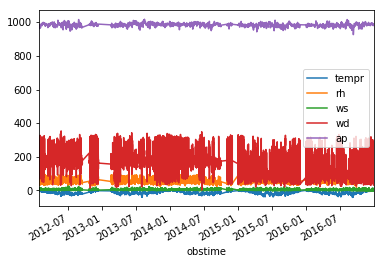

In [434]:
ds_temp=df.tempr
df.plot()
ds_temp=ds_temp.values
print(ds_temp.shape)

In [407]:
model=Sequential()
model.add(LSTM(8,input_shape=(24, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
ds_temp2=np.reshape(ds_temp, (ds_temp.shape[0], 1, 1))

In [414]:
def create_dataset(dataset, look_back=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)):
        end_ix=i+look_back
        if end_ix>len(dataset)-1:
            break
        seqx, seqy= dataset[i:end_ix],dataset[end_ix]
        dataX.append(seqx)
        dataY.append(seqy)
    return np.array(dataX),np.array(dataY)

# look_back=1
trainX, trainY=create_dataset(ds_temp2, 24)
X=np.array(trainX).reshape(38313, 24, 1)
print(X.shape)

Y=np.array(trainY)
Y=np.reshape(Y,(Y.shape[0],1))
print(Y.shape)

(38313, 24, 1)
(38313, 1)
Epoch 1/1
38313/38313 [==============================] - 23s 605us/step - loss: 7.4256


In [ ]:

model.fit(X, Y, epochs=1, verbose=1)

In [435]:
temp_values=ds_temp
# for i in range(60):
#     x_input=temp_values[-24*10:]
#     x_input=x_input.reshape(10,24,1)
#     yhat=model.predict(x_input, verbose=1)
#     temp_values=np.append(temp_values,yhat)
for i in range(100):
    x_input=temp_values[-365*24:]
    x_input=x_input.reshape(365,24,1)
    yhat=model.predict(x_input, verbose=1)
    temp_values=np.append(temp_values,yhat[0])


365/365 [==============================] - 0s 101us/step


365/365 [==============================] - 0s 149us/step


365/365 [==============================] - 0s 206us/step


365/365 [==============================] - 0s 177us/step


365/365 [==============================] - 0s 235us/step


365/365 [==============================] - 0s 215us/step


365/365 [==============================] - 0s 209us/step


365/365 [==============================] - 0s 242us/step


365/365 [==============================] - 0s 202us/step


365/365 [==============================] - 0s 235us/step


365/365 [==============================] - 0s 232us/step


(5000, 45000)

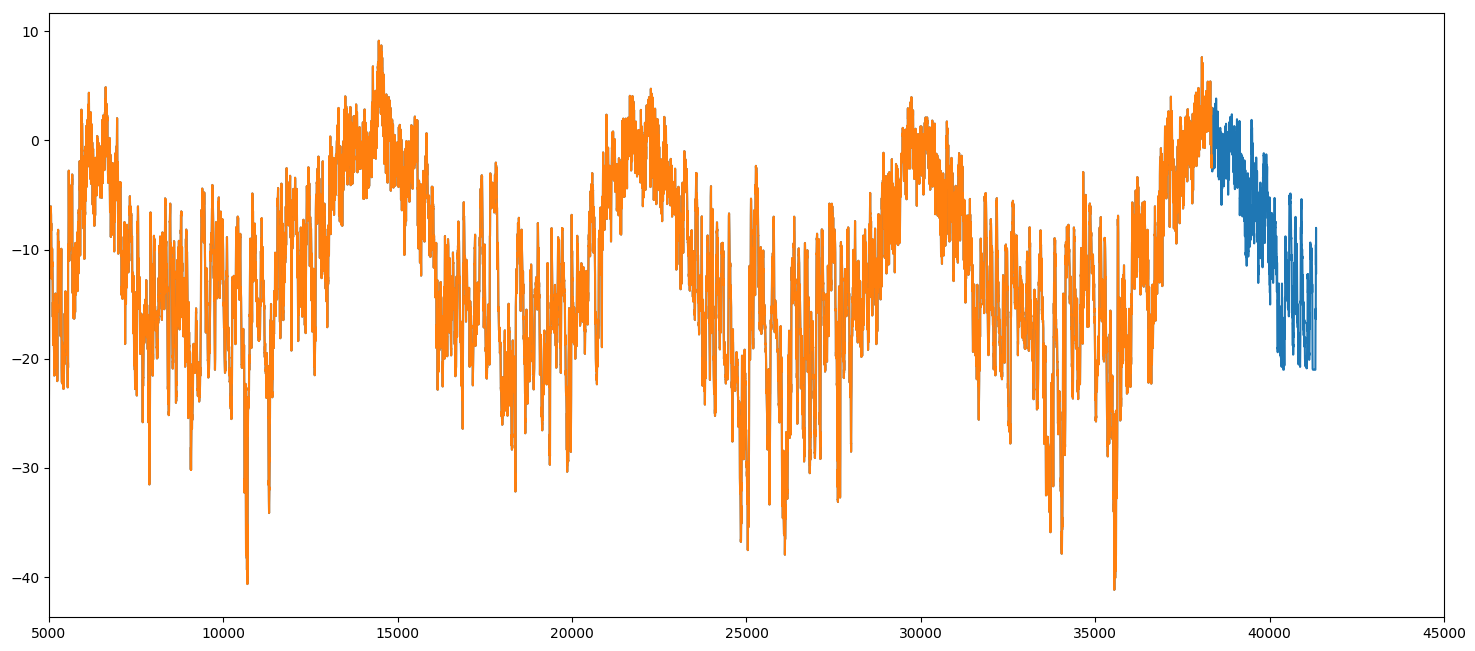

In [436]:
plt.rcParams.update({'figure.figsize':(18,8),'figure.dpi':100})
plt.plot(temp_values)
plt.plot(np.reshape(ds_temp,(ds_temp.shape[0],1)))
plt.xlim(5000,45000)